In [1]:
from lib import *

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


C:\Users\dylan\Documents\Dev\School\Xtractofuse\LightGlue\lightglue\lightglue.py:24: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @torch.cuda.amp.custom_fwd(cast_inputs=torch.float32)


In [2]:
init_light_glue()

Using cuda


In [3]:
DATASET_PATH = Path('data/long-hallway')

In [4]:
validate_dataset(DATASET_PATH)

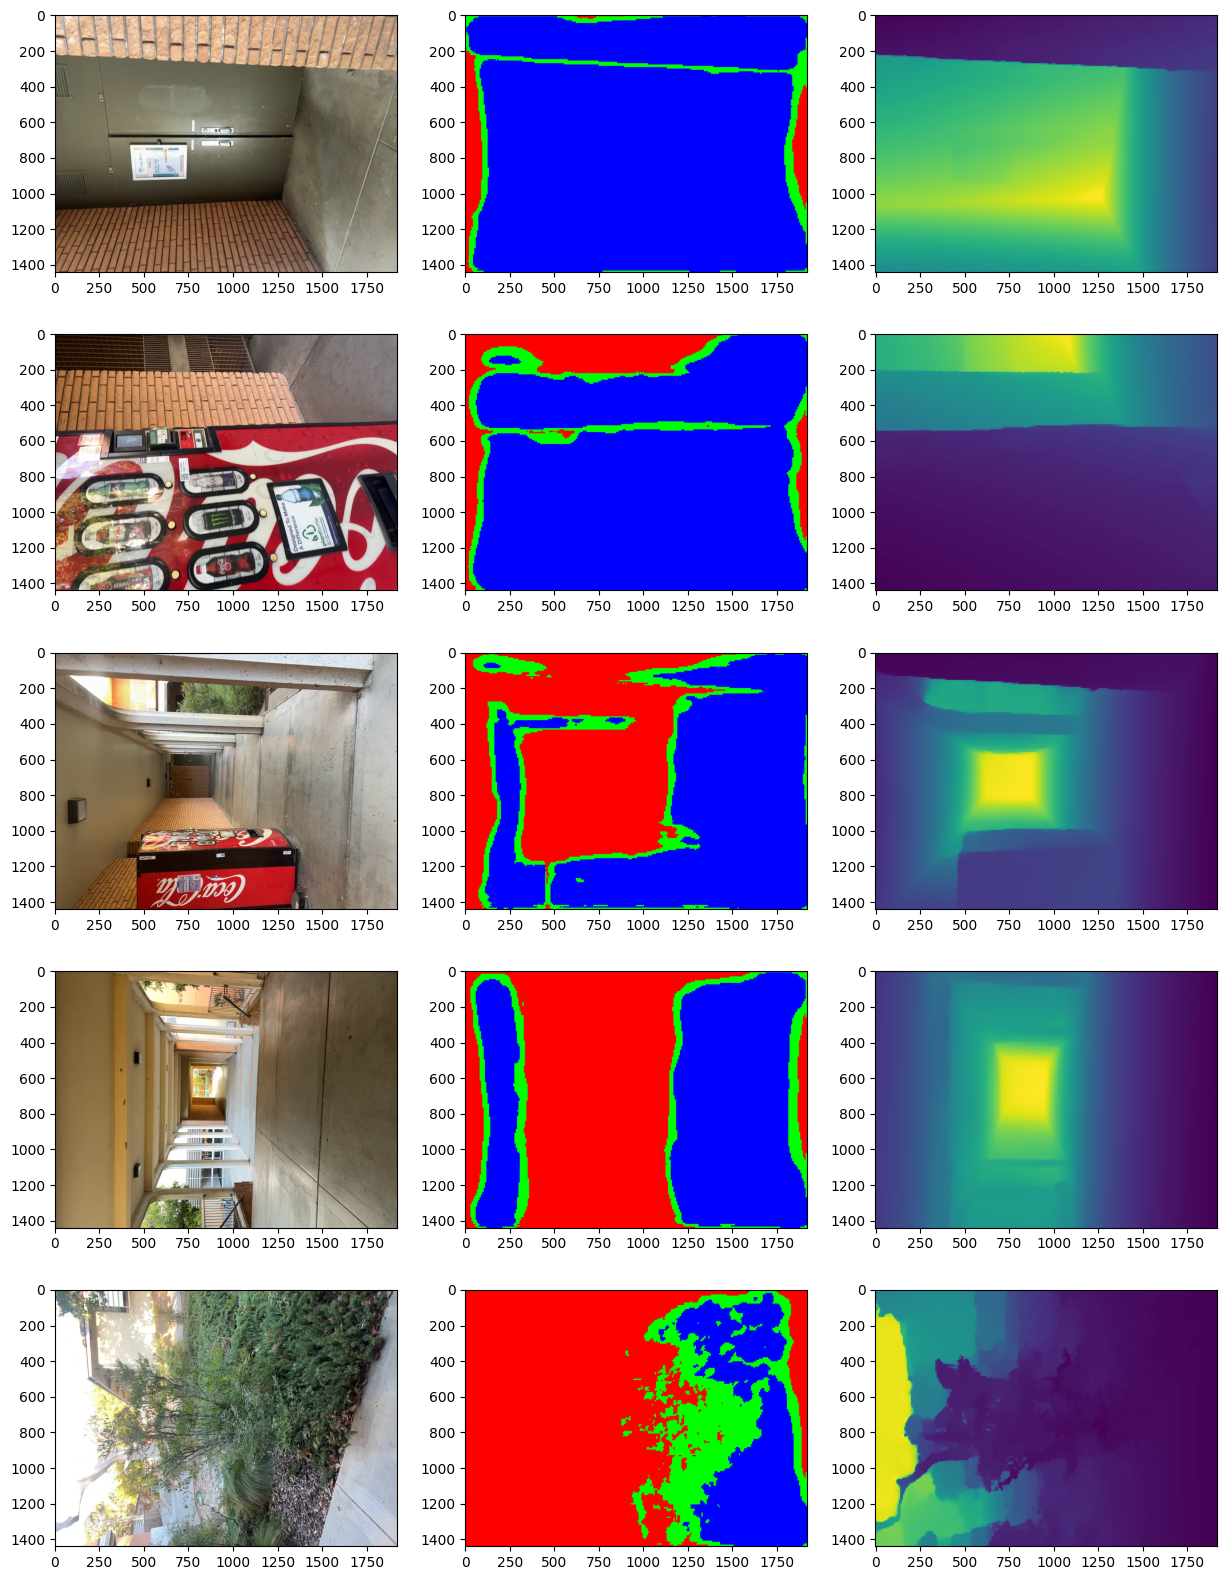

In [5]:
show_random_sample(DATASET_PATH)

In [15]:
EVERY = 1
MAX_NUM_FRAMES = 100

exp_point_cloud, rgb, control_point_cloud, rsme_history = video_to_point_cloud(DATASET_PATH, ransac_matching_threshold=100.0, every=EVERY, max_frames=MAX_NUM_FRAMES)

Processing Frame #1 (for free, since we define it as the origin)
Processing frame #2... Data Load Done (0.12s) - Point Cloud Done (0.10s) - RANSAC Done (0.57s) - ICP Done (0.00s) - Control Done (0.10s) - Accumulation Done (0.11s) - RSME: 64.88 Done (0.09s) --- Frame finished in 1.08s
Processing frame #3... Data Load Done (0.14s) - Point Cloud Done (0.10s) - RANSAC Done (0.37s) - ICP Done (0.00s) - Control Done (0.11s) - Accumulation Done (0.12s) - RSME: 71.75 Done (0.09s) --- Frame finished in 0.94s
Processing frame #4... Data Load Done (0.14s) - Point Cloud Done (0.11s) - RANSAC Done (0.40s) - ICP Done (0.00s) - Control Done (0.11s) - Accumulation Done (0.13s) - RSME: 83.03 Done (0.08s) --- Frame finished in 0.97s
Processing frame #5... Data Load Done (0.14s) - Point Cloud Done (0.10s) - RANSAC Done (0.39s) - ICP Done (0.00s) - Control Done (0.11s) - Accumulation Done (0.14s) - RSME: 74.26 Done (0.09s) --- Frame finished in 0.97s
Processing frame #6... Data Load Done (0.13s) - Point C

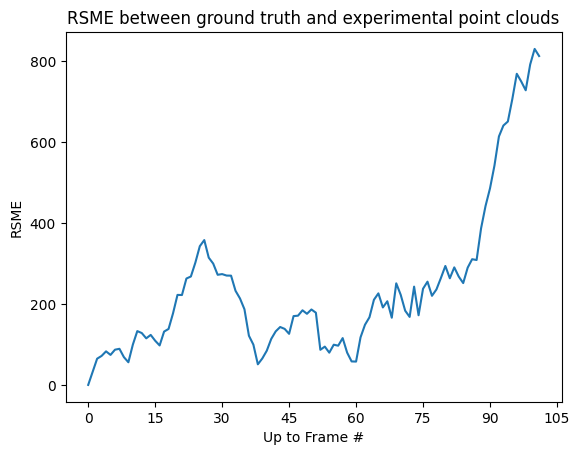

In [16]:

# Graph out rsme_history

fig = plt.figure()
ax = fig.add_subplot()

total_frames_in_dataset = get_total_frames(DATASET_PATH)

# Calculate the frame ids given that we always add frame 0 (as origin)
# we skip EVERY frames and we only want NUM_FRAMES
x = np.concatenate(([0], np.arange(2, total_frames_in_dataset, EVERY)))[0:len(rsme_history)]

ax.plot(x, rsme_history)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.set_xlabel("Up to Frame #")
ax.set_ylabel("RSME")
ax.set_title("RSME between ground truth and experimental point clouds");

In [18]:
visualize_point_cloud(exp_point_cloud, rgb)